
## Perceptron
#### (Artificial Neuron)
- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy
(-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent
### Learning Goals
- How to implement Perceptron?
- Understanding Vectorization,
- writing efficient Code
- without using for loop!
- What is the meaning of "Linear Classifier"?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [3]:
X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=1) #Linearly Separable


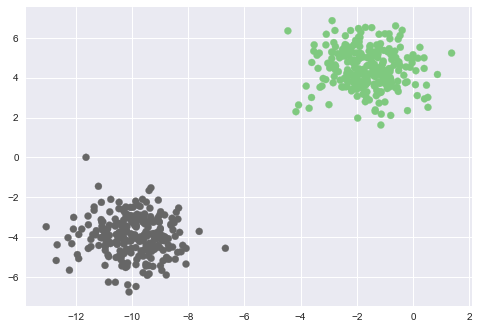

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

## Model and helper functions

In [5]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the Preditctions

In [6]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [10]:
weights = train(X,Y,learning_rate=0.8,maxEpochs=1000)
print(weights) # 3 as 2 features

Epoch 0 Loss 0.0384
Epoch 10 Loss 0.0094
Epoch 20 Loss 0.0048
Epoch 30 Loss 0.0031
Epoch 40 Loss 0.0023
Epoch 50 Loss 0.0018
Epoch 60 Loss 0.0015
Epoch 70 Loss 0.0012
Epoch 80 Loss 0.0011
Epoch 90 Loss 0.0010
Epoch 100 Loss 0.0009
Epoch 110 Loss 0.0008
Epoch 120 Loss 0.0007
Epoch 130 Loss 0.0007
Epoch 140 Loss 0.0006
Epoch 150 Loss 0.0006
Epoch 160 Loss 0.0005
Epoch 170 Loss 0.0005
Epoch 180 Loss 0.0005
Epoch 190 Loss 0.0005
Epoch 200 Loss 0.0004
Epoch 210 Loss 0.0004
Epoch 220 Loss 0.0004
Epoch 230 Loss 0.0004
Epoch 240 Loss 0.0004
Epoch 250 Loss 0.0004
Epoch 260 Loss 0.0003
Epoch 270 Loss 0.0003
Epoch 280 Loss 0.0003
Epoch 290 Loss 0.0003
Epoch 300 Loss 0.0003
Epoch 310 Loss 0.0003
Epoch 320 Loss 0.0003
Epoch 330 Loss 0.0003
Epoch 340 Loss 0.0003
Epoch 350 Loss 0.0003
Epoch 360 Loss 0.0003
Epoch 370 Loss 0.0002
Epoch 380 Loss 0.0002
Epoch 390 Loss 0.0002
Epoch 400 Loss 0.0002
Epoch 410 Loss 0.0002
Epoch 420 Loss 0.0002
Epoch 430 Loss 0.0002
Epoch 440 Loss 0.0002
Epoch 450 Loss 0.0002

## Perceptron Implementation - Part-II
- Make Predictions
- Visualise Decison Surface
- Linear vs Non-linear classification

In [13]:
x1 = np.linspace(-12,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

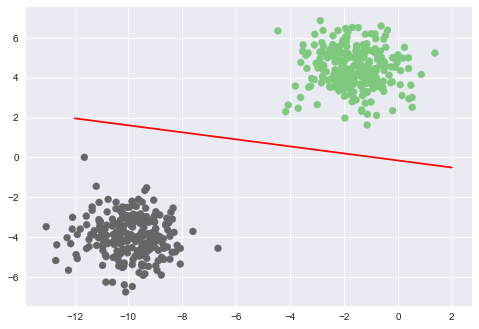

In [14]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [15]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [16]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

1.0


In [17]:
Y_==Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,